In [1]:
! pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.1/390.1 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [32]:
! pip install noisereduce

In [3]:
import librosa, librosa.display
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import IPython.display as ipd
import noisereduce as nr

In [4]:
from util import data_address
data_address 

'./data/'

In [5]:
#save all audio files as a list
audio = glob(data_address + 'VOiCES_devkit/distant-16k/speech/test/rm1/babb/*/*.wav')

In [6]:
audio[:10]

['./data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0115\\Lab41-SRI-VOiCES-rm1-babb-sp0115-ch121720-sg0008-mc01-stu-clo-dg040.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0115\\Lab41-SRI-VOiCES-rm1-babb-sp0115-ch121720-sg0008-mc05-stu-far-dg040.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0115\\Lab41-SRI-VOiCES-rm1-babb-sp0115-ch121896-sg0012-mc01-stu-clo-dg050.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0115\\Lab41-SRI-VOiCES-rm1-babb-sp0115-ch121896-sg0012-mc05-stu-far-dg050.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0118\\Lab41-SRI-VOiCES-rm1-babb-sp0118-ch121721-sg0026-mc01-stu-clo-dg060.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0118\\Lab41-SRI-VOiCES-rm1-babb-sp0118-ch121721-sg0026-mc05-stu-far-dg060.wav',
 './data/VOiCES_devkit/distant-16k/speech/test/rm1/babb\\sp0118\\Lab41-SRI-VOiCES-rm1-babb-sp0118-ch124588-sg0013-mc01-stu-clo-dg040.wav',
 './data/VOiCES_devkit/dist

In [7]:
len(audio)

400

In [8]:
#load and play the first audio in the list
signal, sr = librosa.load(audio[0])
ipd.Audio(signal, rate=sr)

In [9]:
#check the sample rate
sr

22050

In [10]:
#print signal
signal

array([-0.00168945, -0.00320331, -0.0037298 , ..., -0.00094043,
       -0.00086448,  0.        ], dtype=float32)

In [11]:
#print the shape of the raw data array
signal.shape

(348060,)

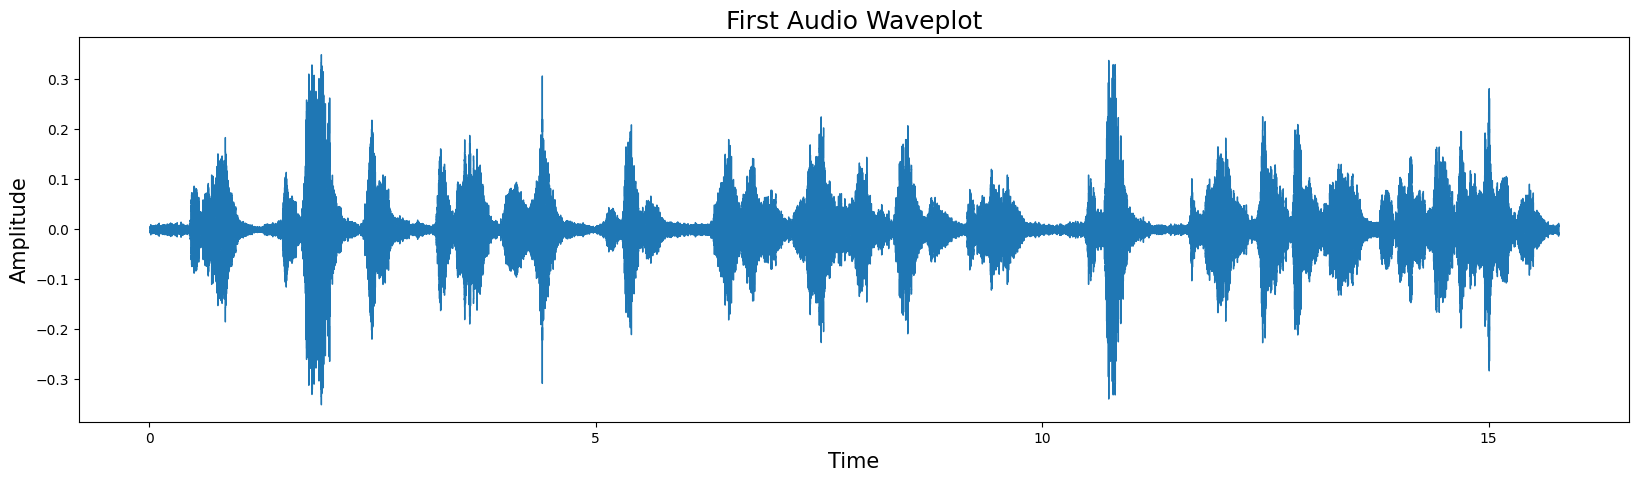

In [12]:
#visualize the waveplot of the first audio file
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('First Audio Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [13]:
#clean up background noise
clean_audio = nr.reduce_noise(signal, sr=sr)

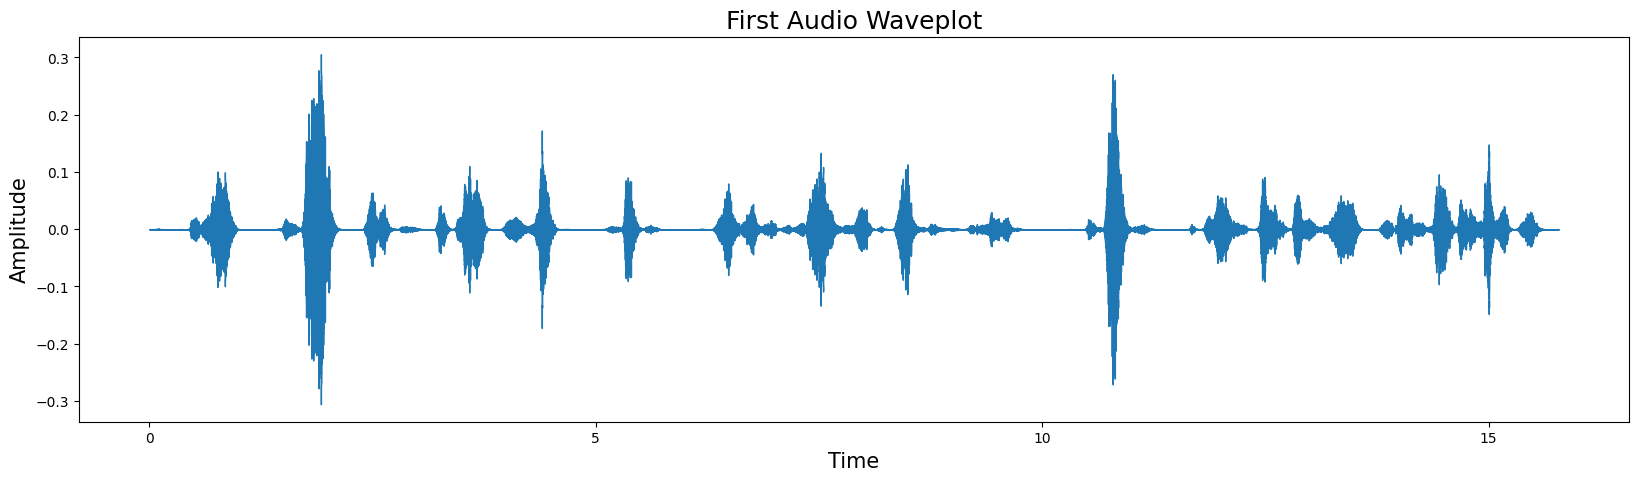

In [14]:
#visualize the waveplot of the cleaned first audio file
plt.figure(figsize=(20, 5))
librosa.display.waveshow(clean_audio, sr=sr)
plt.title('First Audio Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [15]:
ipd.Audio(clean_audio, rate=sr)

In [16]:
#import soundfile as sf

#sf.write('denoise.wav', clean_audio, sr, subtype='PCM_24')

In [17]:
clean_audio

array([-8.6575288e-05, -2.9502897e-05, -4.9687718e-05, ...,
        1.9926545e-05, -4.5416611e-05,  5.6717639e-05], dtype=float32)

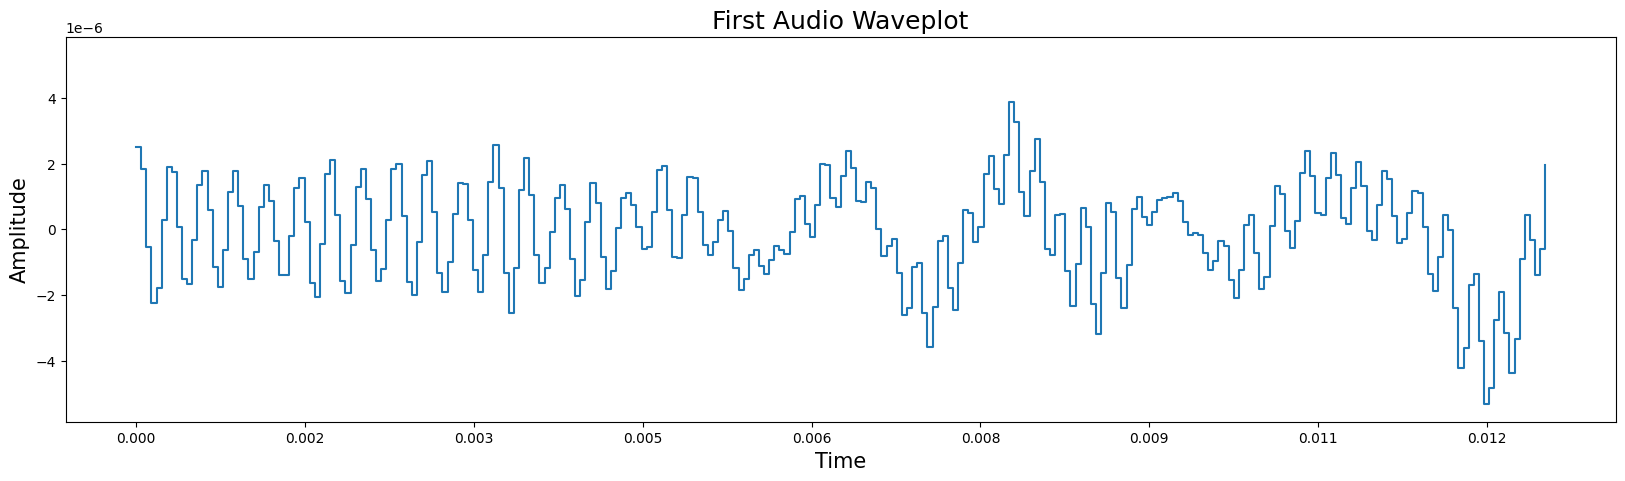

In [18]:
#zoom in on waveplot
plt.figure(figsize=(20, 5))
librosa.display.waveshow(clean_audio[255823:256100], sr=sr)
plt.title('First Audio Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [19]:
#set standard length of audio
target_length = sr * 15

if len(clean_audio) > target_length:
    clean_audio = clean_audio[:target_length] 
elif len(clean_audio) < target_length:
    clean_audio = np.pad(clean_audio, (0, target_length - len(clean_audio)), 'constant')  # Pad if shorter


In [20]:
#apply short term fourier transform
transformed_audio = librosa.stft(clean_audio)

#convert the transformed signal to decibels
d_audio = librosa.amplitude_to_db(np.abs(transformed_audio), ref=np.max)

d_audio.shape

(1025, 646)

C:\Users\bobmst\AppData\Local\Temp\ipykernel_45004\3588371342.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(transformed_audio, sr=sr)


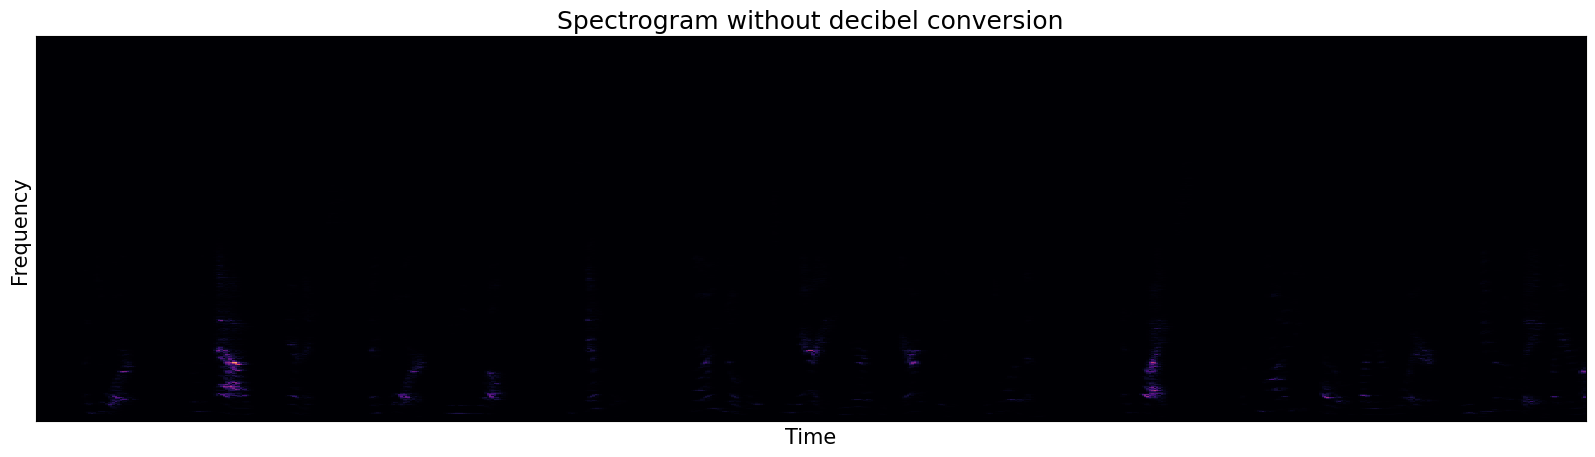

In [21]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(transformed_audio, sr=sr)
plt.title('Spectrogram without decibel conversion', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

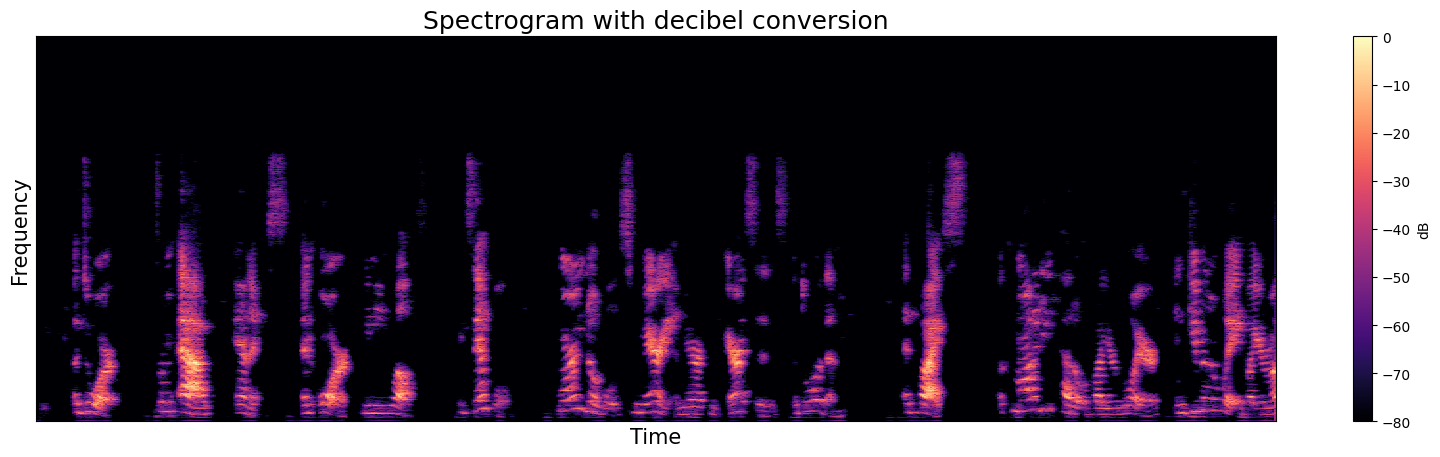

In [22]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(d_audio, sr=sr)
plt.title('Spectrogram with decibel conversion', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.colorbar(label='dB')
plt.show()

In [23]:
#create mel spectrogram
mel_audio = librosa.feature.melspectrogram(S=d_audio, n_mels=128)

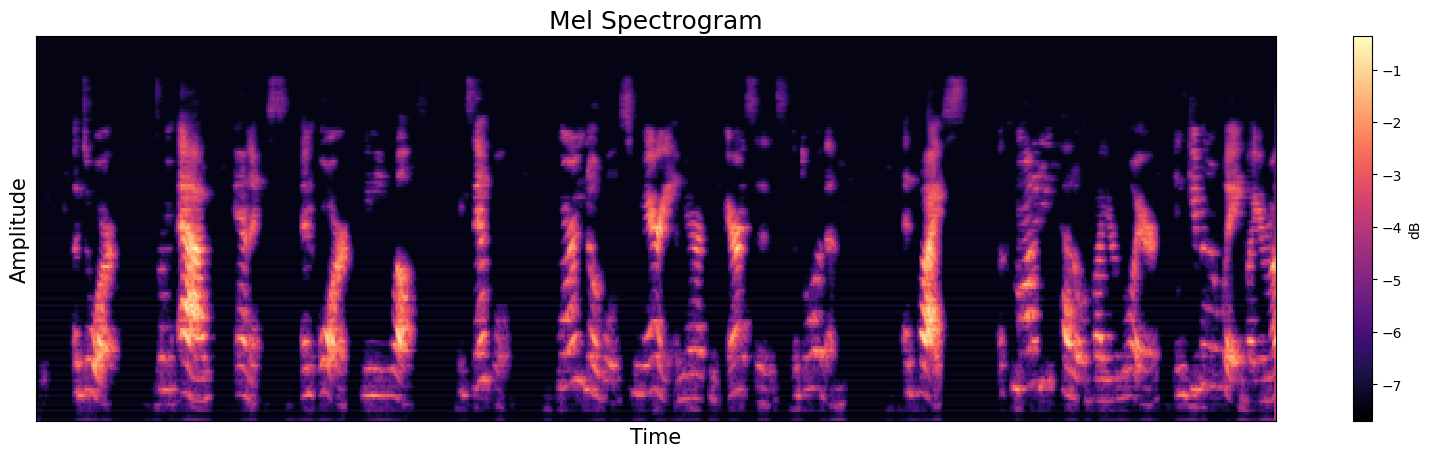

In [24]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(mel_audio, sr=sr)
plt.title('Mel Spectrogram', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.colorbar(label='dB')
plt.show()

In [25]:
mel_audio.shape

(128, 646)

In [26]:
#calculate mfccs
mfccs = librosa.feature.mfcc(y=clean_audio, sr=sr, n_mfcc=13)  # Extract 13 MFCCs
mfccs.shape

(13, 646)

In [27]:
#combine mfcc features with mel specs
combined_features = np.concatenate((mel_audio, mfccs), axis=0)
combined_features.shape

(141, 646)